# Decision Trees

In [6]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
!pip install sklearn


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
# Importing libraries
import sklearn
import pandas as pd
import matplotlib
from sklearn.tree import DecisionTreeClassifier

# Datasets
from sklearn.datasets import make_classification

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'sklearn'

### Use make_classification to create a dataset
make_classification = Generate a random n-class classification problem.

Documentation = https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [8]:
# Create a classification problem
X, y = make_classification(n_samples = 1000, n_features = 20, n_informative = 5, random_state = 1)

NameError: name 'make_classification' is not defined

In [9]:
# Split into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: name 'train_test_split' is not defined

In [9]:
# Fit a Decision tree
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

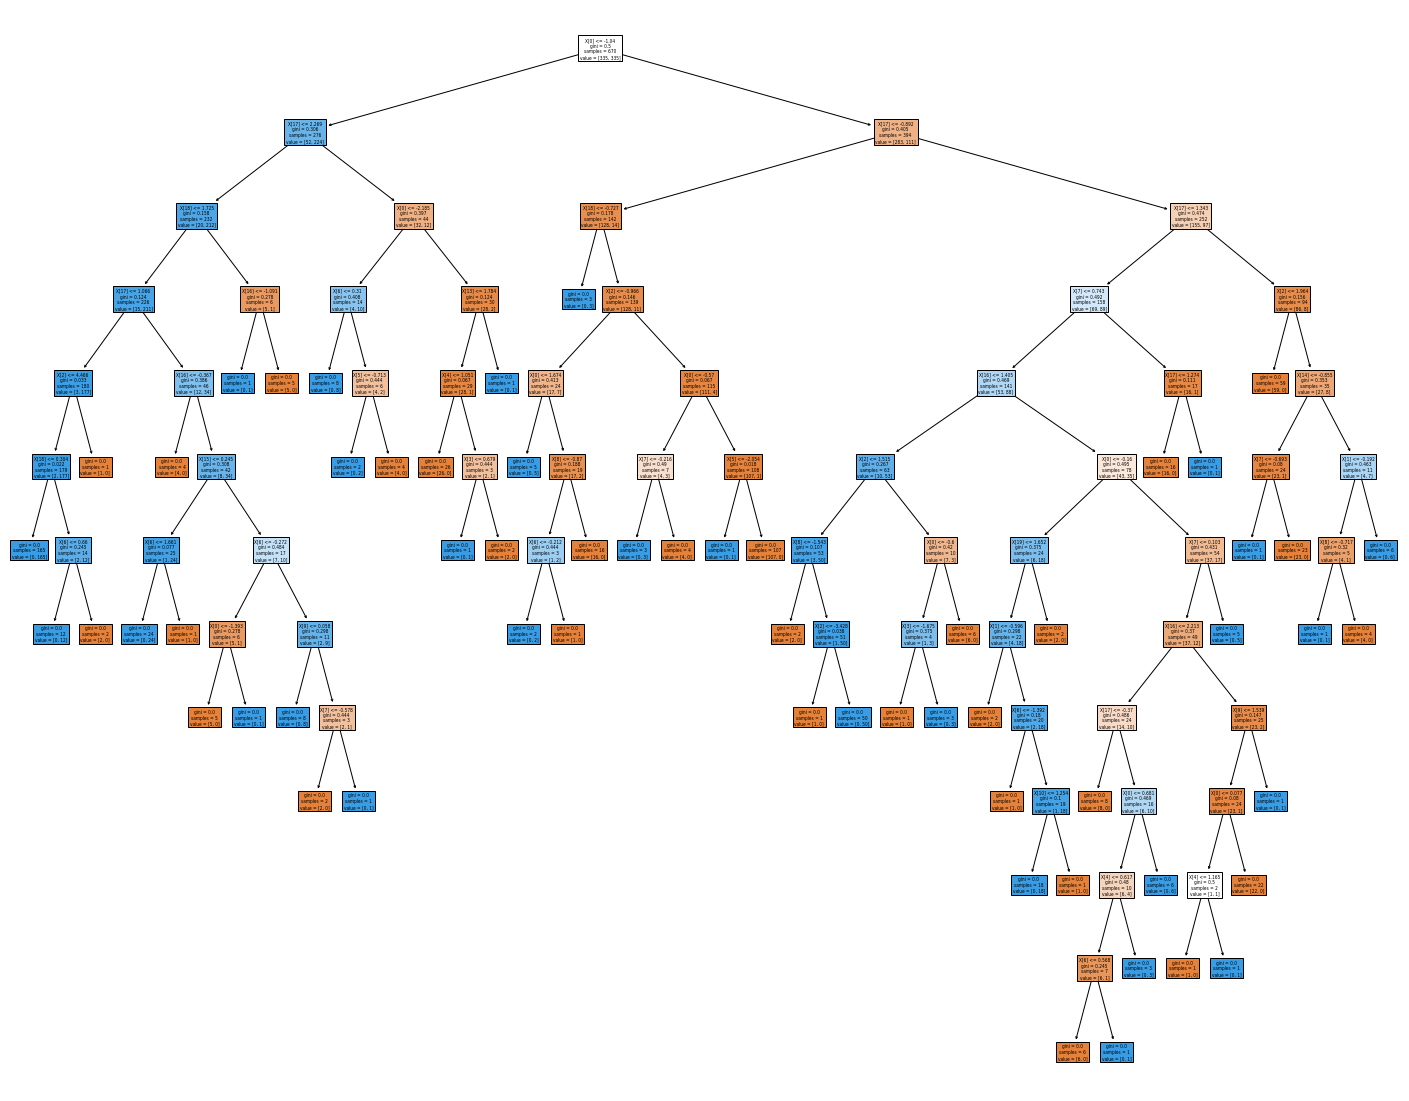

In [10]:
# Plot a Decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt,filled=True)

In [11]:
# Evaluating the Decision tree on training dataset
y_train_pred = dt.predict(X_train)
print("Accuracy on training data: " + str(round(accuracy_score(y_train, y_train_pred), 2)))

# Evaluating the Decision tree on holdout or test dataset
y_test_pred = dt.predict(X_test)
print("Accuracy on holdout data: " + str(round(accuracy_score(y_test, y_test_pred), 2)))

Accuracy on training data: 1.0
Accuracy on holdout data: 0.79


Since the accurcy on training data is 1.0 (= 100%), it is overfitting. So, it will not perform as well on the holdout dataset. 
Can we do better?

### Limit the depth of the tree
Using the **hyperparameter** `max_depth` to limit how deep the tree grows 

In [12]:
# Fit a Decision tree
dt = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dt.fit(X_train, y_train)

# Evaluate a Decision tree
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print("Accuracy on training data: " + str(round(accuracy_score(y_train, y_train_pred), 2)))
print("Accuracy on holdout data: " + str(round(accuracy_score(y_test, y_test_pred), 2)))

Accuracy on training data: 0.9
Accuracy on holdout data: 0.83


### Limit the number of splits of the tree
Using the **hyperparameter** `min_samples_split` - minimum number of samples required to split an internal node 

In [13]:
# Fit a Decision tree
dt = DecisionTreeClassifier(min_samples_split = 10, random_state = 1)
dt.fit(X_train, y_train)

# Evaluate a Decision tree
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print("Accuracy on training data: " + str(round(accuracy_score(y_train, y_train_pred), 2)))
print("Accuracy on holdout data: " + str(round(accuracy_score(y_test, y_test_pred), 2)))

Accuracy on training data: 0.98
Accuracy on holdout data: 0.79


### Limiting complexity of the tree

*   **ccp_alpha**: non-negative float, default=0.0: Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See [Minimal Cost-Complexity Pruning](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning) for details.

In [14]:
# Fit a Decision tree
dt = DecisionTreeClassifier(ccp_alpha=0.01, random_state = 1)
dt.fit(X_train, y_train)

# Evaluate a Decision tree
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print("Accuracy on training data: " + str(round(accuracy_score(y_train, y_train_pred), 2)))
print("Accuracy on holdout data: " + str(round(accuracy_score(y_test, y_test_pred), 2)))

Accuracy on training data: 0.87
Accuracy on holdout data: 0.84


Of course, the hyperparameters can be combined

In [15]:
# Fit a Decision tree
dt = DecisionTreeClassifier(ccp_alpha=0.01, min_samples_split = 20, max_depth = 5, random_state = 1)
dt.fit(X_train, y_train)

# Evaluate a Decision tree
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print("Accuracy on training data: " + str(round(accuracy_score(y_train, y_train_pred), 2)))
print("Accuracy on holdout data: " + str(round(accuracy_score(y_test, y_test_pred), 2)))

Accuracy on training data: 0.87
Accuracy on holdout data: 0.83


### Exercise

Use the data created in the cell below. Split it into training and test data. Fit it to a decision tree with and without hyperparameter tuning. Print the results showing the performance of the tree on the training data and on the test data data with and without hyperparameter tuning.

Show accuracy scores with 3 decimal places.

In [ ]:
# Create a classification problem
X_dt, y_dt = make_classification(n_samples = 2000, n_features = 30, n_informative = 7, random_state = 1)

In [ ]:
# Solution here

# Random Forest
Ensemble of individual decision trees

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create a classification problem
X, y = make_classification(n_samples = 1000, n_features = 20, n_informative = 5, random_state = 1)

# Split into training and holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Fit random forest
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)

# Evaluate random forest
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print("Accuracy on training data: " + str(round(accuracy_score(y_train, y_train_pred), 2)))
print("Accuracy on holdout data: " + str(round(accuracy_score(y_test, y_test_pred), 2)))

So, the model is overfitting. This is usual in decision trees. So, we need to use hyperparameters to prune the tree.

### Hyperparameters of the base learner (tree)
The first set of hyperparameters is used to control the tree structure - the base learner. Some of the key hyperparameters:

*   *max_depth*: int, default=None
*   *min_samples_split*: int or float, default=2
*   *ccp_alpha*: non-negative float, default=0.0

### Hyperparameters of the ensemble
*   *n_estimators*: int, default=100. This hyperparameter controls how many __trees__ are part of our random forest.   
*   *max_features*: {“sqrt”, “log2”, None}, int or float, default=”sqrt”. This hyperparameter allows us to select, what amount, or what random proportion from original __features__ are provided to an underlying decision tree.
*   *max_samples*: int or float, default=None. This hyperparameter allows us to select, what amount, or what random proportion from original __observations__ are provided to an underlying decision tree.

In [ ]:
# Grid
default_rf_grid = {# Base learner
                   'max_depth': [2, 3, 4, 5],
                   'min_samples_split': [2, 5, 10],
                   'ccp_alpha': [0.0, 0.0001, 0.001, 0.01],
                   # Ensemble
                   'n_estimators': [100],
                   'max_features': ["log2", "sqrt"],
                   'max_samples': [0.5, 0.7, 0.9]
               }

To try out all the possible combinations of the hyperparameters, we would use `GridSearchCV`. However, since the number of combinations grows very fast and therefore takes longer to calculate, we generally use `RandomizedSearchCV`. This performs a randomized search on hyperparameters. In contrast to `GridSearchCV`, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by `n_iter`. 

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
# Randomized search
rf_to_tune = RandomForestClassifier()
clf = RandomizedSearchCV(rf_to_tune, default_rf_grid, n_iter = 10, random_state = 1)
clf.fit(X_train, y_train)
clf.best_params_

In [ ]:
# Evaluate random forest
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("Accuracy on training data: " + str(round(accuracy_score(y_train, y_train_pred), 2)))
print("Accuracy on holdout data: " + str(round(accuracy_score(y_test, y_test_pred), 2)))

Trying out more number of iterations

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
# Randomized search
rf_to_tune = RandomForestClassifier()
clf = RandomizedSearchCV(rf_to_tune, default_rf_grid, cv = 3, n_iter = 50, random_state = 1)
clf.fit(X_train, y_train)
clf.best_params_

In [ ]:
# Evaluate random forest
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("Accuracy on training data: " + str(round(accuracy_score(y_train, y_train_pred), 2)))
print("Accuracy on holdout data: " + str(round(accuracy_score(y_test, y_test_pred), 2)))

### Exercise

Use the data created in the cell below. Split it into training and test data. Fit it to a random forest with and without hyperparameter tuning. 

Print the results showing the performance of the model on the training data and on the test data data with and without hyperparameter tuning.

Show accuracy scores with 3 decimal places.

How long did it take to train the model?

In [ ]:
# Create a classification problem
X_rf, y_rf = make_classification(n_samples = 1000, n_features = 20, n_informative = 5, random_state = 1)

In [ ]:
# Solution here

# Linear Regression
Let us create a dataset for linear regression.

Let us also insert a few outliers in it for demonstration purpose.

In [ ]:
from sklearn import datasets
X, y = datasets.make_regression(n_samples = 100, 
                                n_features = 1, 
                                n_informative = 1,
                                bias = 42,
                                noise=5,
                                random_state=42)
X = pd.DataFrame(X)
y = pd.DataFrame(y)

# Adding outliers for demonstration purpose
X_outlier = pd.DataFrame([-3, -2.9, 1.9, 2])
y_outlier = pd.DataFrame([125, 125, -75, -75])

y = pd.concat([y, y_outlier], ignore_index=True)
X = pd.concat([X, X_outlier], ignore_index=True)

# Note: We are not splitting the data into test and train here, just for demonstration purpose.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# instantiate the model
model = LinearRegression()

# fit the model
model.fit(X, y)

In [ ]:
# return the score of the model on our training data
model.score(X, y)

Here the baseline model would be a simple average of all the values.

1 would be a perfect score and 0 would be the score of the baseline model.

In [ ]:
# Make prections for all observations in the training dataset using the trained model
y_pred = model.predict(X)

In [ ]:
import matplotlib.pyplot as plt
# run this cell to visualize original data together with predictions
plt.scatter(X, y, label='data')
plt.scatter(X, y_pred, label='predictions')
plt.legend(fontsize=15)
plt.show()

In [ ]:
# Calculating the errors between the predicted and actual values
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

print(f'Mean absolute error: {mae}')
print(f'Mean squared error: {mse}')
print(f'Root mean squared error: {rmse}')

### Exercise

Use the data created in the cell below. Split it into training and test data. Fit it to a linear regression model. Plot the input data and predictions. 

In [ ]:
X_reg, y_reg = datasets.make_regression(n_samples = 1000, 
                                n_features = 1, 
                                n_informative = 1,
                                bias = 42,
                                noise=5,
                                random_state=21)

In [ ]:
# Solution here

# k-Nearest-Neighbors (kNN) Algorithm 

We will work with one of the datasets available in sklearn - breast cancer. This dataset contains 30 numeric features and 1 binary target feature (malignant or benign) and is hence an ideal candidate for kNN algorithm. Details [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset).

In [ ]:
# Loading a sample dataset from sklearn
import numpy as np
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer["data"]
y = breast_cancer["target"]

print("Dimensions of independent features: " + str(X.shape))
print("Dimensions of target feature: " + str(y.shape))

In [ ]:
# Distribution of the target feature
np.unique(y, return_counts=True)

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate
scaler = MinMaxScaler()

# Fit
scaler.fit(X_train)

# Transform (rewrite original dfs)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate
kNN_simplest = KNeighborsClassifier(n_neighbors = 1)

# Fit
kNN_simplest.fit(X_train, y_train)

# Predict
y_train_pred = kNN_simplest.predict(X_train)
y_test_pred = kNN_simplest.predict(X_test)

In [ ]:
# Evaluate
print("Accuracy on training data: " + str(round(accuracy_score(y_train, y_train_pred), 2)))
print("Accuracy on holdout data: " + str(round(accuracy_score(y_test, y_test_pred), 2)))

### Exercise

Use the breast cancer data. Use `GridSearchCV` to tune the kNN hyperparameters: `n_neighbors` and `algorithm`. Use the [scikit-learn](https://scikit-learn.org/) documentation to find the relevant parameter values.

Print the accuracy on the training and holdout data after tuning the hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV 

# Solution here